<a href="https://colab.research.google.com/github/TheGodseeker/ML_PR/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [24]:
from statistics import median, mean, stdev
from math import erfc
#Класс
class Burst:
  def __init__(self, df):
    self.df = df

  #Выбросы по средней
  def bursts_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []
    col_series = self.df[column_name] # [(index, value), (index, value)]
    cur_series_size = 0

    for index, value in col_series.items():
      if abs(value) - mean_data > maximum:
        result.append(index)

    return result

  #Выбросы по критерию Шовене
  def burst_by_shovene(self, column_name):
    col_series = self.df[column_name]
    cur_series_size = 0
    result = []
    my_mean = mean(self.df[column_name])
    my_stdev = stdev(self.df[column_name])

    for index, value in col_series.items():
      if (my_stdev > 0) and erfc(abs(value-my_mean)/my_stdev) < 1 / (2*col_series.size):
          result.append(index)

    return result
  #Выбросы по квартилям
  def burst_by_quart(self, column_name):
    col_series = self.df[column_name]
    cur_series_size = 0
    result = []
    qs = col_series.quantile([0.25,0.5,0.75])

    for index, value in col_series.items():
      if (value > qs[0.75]) or (value < qs[0.25]):
        result.append(index)

    return result

  #Выбросы по двум переменным
  def burst_by_num(self, column_name, fst, scd):
    col_series = self.df[column_name]
    cur_series_size = 0
    result = []

    for index, value in col_series.items():
      if(value > scd) or (value < fst):
        result.append(index)

    return result

In [3]:
df = pd.read_csv("/content/anime.csv")# чтение файла
df #y - type; x - members

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
df["type"].describe(include="all")

count     12269
unique        6
top          TV
freq       3787
Name: type, dtype: object

In [ ]:
mean = df['members'].mean()# (среднее) ваш код здесь
mean

18071.33886448674

In [ ]:
median = df['members'].median()# (медиана) ваш код здесь
median

1550.0

In [ ]:
mode = df['members'].mode()# (мода) ваш код здесь
mode

0    60
1    72
Name: members, dtype: int64

In [ ]:
min = df['members'].min()# (минимум) ваш код здесь
min

5

In [ ]:
max = df['members'].max()# (максимум) ваш код здесь
max

1013917

In [ ]:
std = df['members'].std()# (стандартное отклонение) Ваш код здесь
std

54820.67692490696

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [ ]:
q1 = df['members'].quantile(0.25)# (25% квантиль) ваш код здесь
q1

225.0

In [ ]:
q2 = df['members'].quantile(0.5)# (50% квантиль) ваш код здесь
q2

1550.0

In [ ]:
q3 = df['members'].quantile(0.75)# (75% квантиль) ваш код здесь
q3

9437.0

In [ ]:
iqr = q3 - q1# (интерквартильный размах) ваш код здесь
iqr

9212.0

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Операясь на значения медианы, максимума и минимума, можно сказать, что в датасете присутствует выброс.
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

<Axes: xlabel='rating', ylabel='Count'>

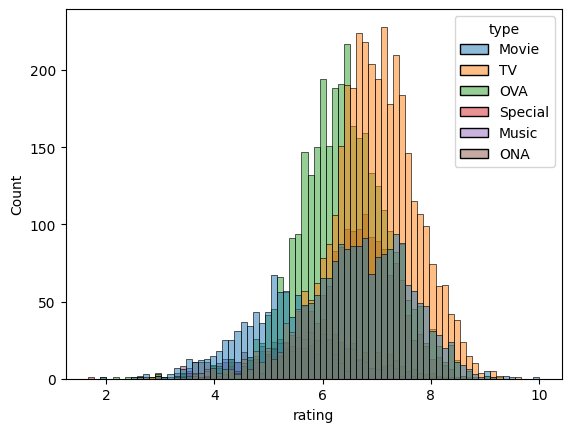

In [ ]:
# types = {}

# for val in df["type"]:
#   if val not in types: types[val] = 0

# types.popitem()

# for cur_type in types:
#   cur_mem = df[df["type"]== cur_type]["members"]
#   for n in cur_mem: types[cur_type] += n

# print(types)

# sns.histplot( x = types.values(), hue = types.keys())

sns.histplot(data = df, x = "rating", hue = "type")



> По гистограме можно сказать, аниме типа "TV" является самым высоко рейтинговым жанром аниме.



Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

<Axes: ylabel='rating'>

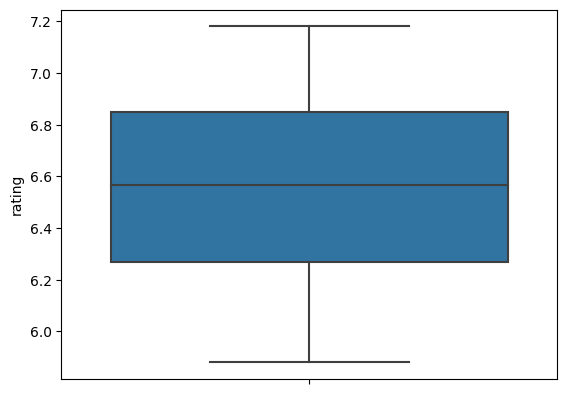

In [10]:
df_bp = df.copy()

#Чистим выбросы
df_bp = df.drop(burster.burst_by_quart("rating"))

sns.boxplot(data = df_bp, y = "rating")



> Оценки всех стандартых тайтлов, не явлющимися ни 10/10 шедеврами, ни полным 0, варьируются между 6.3 и 6.9. В целом оценка подобных тайтлов, не выходит за пределы 5.6 и 7.19.



<Axes: xlabel='type', ylabel='rating'>

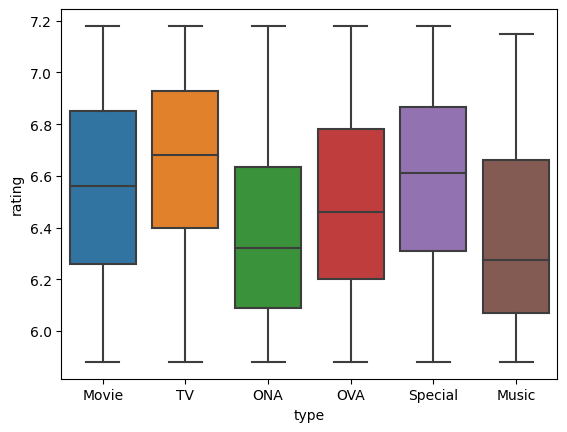

In [13]:

sns.boxplot(data = df_bp, y = "rating", x="type")



> Самым высокорейтинговым типом аниме среди не ультрапопулярных/ульрамусорных тайтлов является TV, самым низкорейтинговым - Music



Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

<Axes: xlabel='rating', ylabel='episodes'>

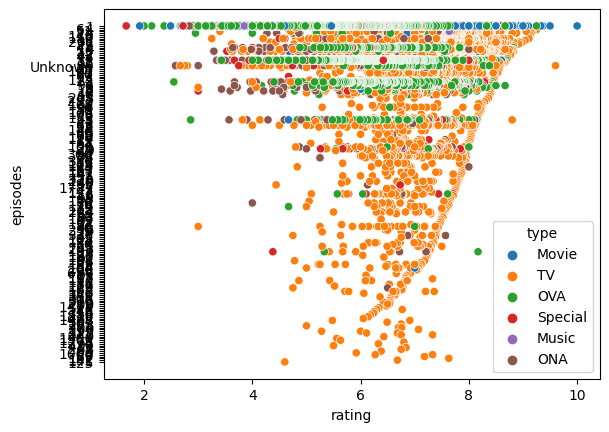

In [31]:
sns.scatterplot(data = df, y = "episodes", x = "rating", hue="type")

<Axes: xlabel='rating', ylabel='episodes'>

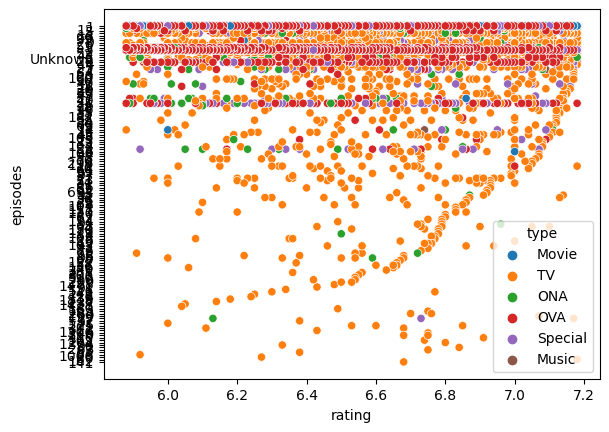

In [32]:
sns.scatterplot(data = df_bp, y = "episodes", x = "rating", hue="type")



> Больше всего собирают оценок TV-тайтлы с большим кол-вом серий, исходя из двух диаграмм рассеивания



Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<ipython-input-76-ec51405d706c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

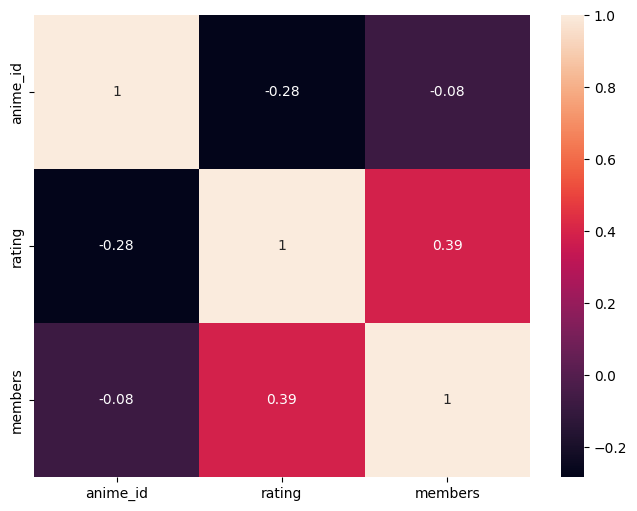

In [ ]:
# Вычисление корреляционной матрицы
corr_matrix = df.corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)



> Данные из столбцов "rating" и "members" хорошо коррелируют, т.е. рейтинг можно более точно определить при большем кол-ве просмотров



**Какие выводы можно сделать на основе графиков и матрицы корреляции?**

**Итог:** можно определить, что аниме в формате ТВ с малым количеством  собирают больше всего зрителей. Данный формат входит в число популярных.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [25]:
#Чистка выбросов по средней и отклонениям

df_mean = df.copy()
outliner = Burst(df_mean)
df_mean.drop(outliner.bursts_by_mean("members"))
#print(mean(df["members"]))

,anime_id,name,genre,type,episodes,rating,members
31,32983,Natsume Yuujinchou Go,"Drama, Fantasy, Shoujo, Slice of Life, Superna...",TV,13,8.76,38865
33,28957,Mushishi Zoku Shou: Suzu no Shizuku,"Adventure, Fantasy, Historical, Mystery, Seine...",Movie,1,8.75,32266
37,31757,Kizumonogatari II: Nekketsu-hen,"Action, Mystery, Supernatural, Vampire",Movie,1,8.73,34347
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
48,21329,Mushishi Special: Hihamukage,"Adventure, Fantasy, Historical, Mystery, Seine...",Special,1,8.66,49036
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [26]:
#Чистка выбросов по Шовене

df_shevene = df.copy()
burster = Burst(df_mean)
df_shevene.drop(burster.burst_by_shovene("members"))

,anime_id,name,genre,type,episodes,rating,members
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [27]:
#Чистка выбросов по квартелям

df_q = df.copy()
burster = Burst(df_mean)
df_q.drop(burster.burst_by_quart("members"))

,anime_id,name,genre,type,episodes,rating,members
111,2921,Ashita no Joe 2,"Drama, Sports",TV,47,8.48,6259
205,32005,Detective Conan Movie 20: The Darkest Nightmare,"Action, Mystery, Police, Shounen",Movie,1,8.32,6229
261,1382,Yuusha-Ou GaoGaiGar Final,"Adventure, Drama, Mecha, Sci-Fi, Shounen",OVA,8,8.25,5001
305,3371,"Ginga Eiyuu Densetsu Gaiden: Senoku no Hoshi, ...","Action, Military, Sci-Fi, Space",OVA,24,8.20,8621
317,17739,Hidamari Sketch: Sae Hiro Sotsugyou-hen,"Comedy, School, Slice of Life",OVA,2,8.19,5959
...,...,...,...,...,...,...,...
12266,7914,Kyuukyoku no Chef wa Oishinbo Papa,Hentai,OVA,1,5.43,262
12271,5559,Nijuusou: Wana ni Ochita Onna-tachi,Hentai,OVA,1,5.20,240
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240


In [28]:
#Чистка выбросов по двум переменным
df_nums = df.copy()
burster = Burst(df_nums)
df_nums.drop(burster.burst_by_num("members", 5000, 20000)) #убираем значения memberes от 5к до 20к

,anime_id,name,genre,type,episodes,rating,members
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2,8.60,11104
103,11917,Major: World Series,"Comedy, Drama, Sports",OVA,2,8.50,13405
111,2921,Ashita no Joe 2,"Drama, Sports",TV,47,8.48,6259
119,2559,Romeo no Aoi Sora,"Adventure, Drama, Historical, Slice of Life",TV,33,8.47,15074
...,...,...,...,...,...,...,...
11982,7110,Shounen Maid Kuuro-kun: Tenshi no Uta,"Hentai, Yaoi",OVA,1,5.79,9820
12039,2169,Ice,"Action, Military, Sci-Fi, Shoujo Ai, Yuri",OVA,3,5.68,5247
12096,724,Enzai,"Hentai, Horror, Yaoi",OVA,2,5.55,13711
12122,31283,Bikini Warriors Special,"Comedy, Ecchi, Fantasy, Parody, Yuri",Special,1,5.50,5191


### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]